## Exercise 1: basic scipy
a. Plot the scipy - defined error function

b. Define a normal Gaussian function centered in 0 and with standard deviation equal to 0.5. Define it manually or via  `scipy.stats.norm()` -- in the second case, read its documentation! It does not work in the same way as other special functions.

c. Integrate numerically the defined gaussian between -0.3 and +1. Test different  precision and compare the results and errors.

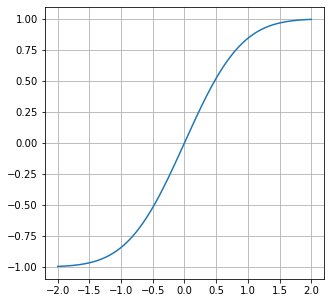

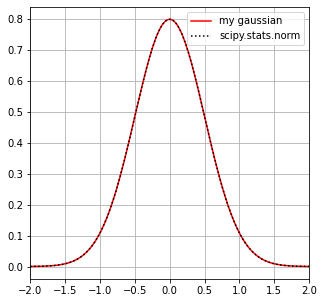

quad function default returns 0.7257468822499266 with error 1.5653886367391922e-12 
 execution time 0.04900503158569336
quad function with epsabs 1e-5 returns 0.725746882249927 with error 2.5857328971319437e-07 
 execution time 0.038037776947021484
quad function with epsabs 1e-10 returns 0.7257468822499266 with error 1.5653886367391922e-12 
 execution time 0.04500150680541992


In [29]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time

# a
from scipy.special import erf
fig, ax = plt.subplots(figsize=(5,5))
x = np.linspace(-2,2, 200)
plt.plot(x, erf(x))
plt.grid()
plt.show()

# b
# let's define the gaussian function
def my_gaussian(x,mean,sigma):
    return np.exp(-0.5*(x-mean)**2/sigma**2)/np.sqrt(2*np.pi)/sigma
from scipy.stats import norm
# and find the corresponding scipy version of it
scipy_norm = norm(loc = 0.0, scale=0.5)
# I then define the x-axis values
x = np.linspace(-2,2, 200)
# to ultimately plot and confront the results
fig, ax = plt.subplots(figsize=(5,5))
plt.xlim(-2,2)
plt.plot(x, my_gaussian(x, 0.0, 0.5),"r", label = "my gaussian")
plt.plot(x, scipy_norm.pdf(x), "k:", label = "scipy.stats.norm")
plt.legend()
plt.grid()
plt.show()

# c
# let's just iterate the integration
# first with custom integration precision
t1=time.time()
res, err = scipy.integrate.quad(scipy_norm.pdf, a = -0.3, b= +50)
t2=time.time()
print("quad function default returns",
      res, "with error",err,'\n execution time',t2-t1)
# I then try with a smaller precision
t1=time.time()
res, err = scipy.integrate.quad(scipy_norm.pdf,
                                a = -0.3, b= +50, epsabs = 1e-5)
t2=time.time()
print("quad function with epsabs 1e-5 returns",
      res, "with error", err,'\n execution time',t2-t1)
# and with an even tinier precision
t1=time.time()
res, err = scipy.integrate.quad(scipy_norm.pdf,
                                a = -0.3, b= +50, epsrel = 1e-10)
t2=time.time()
print("quad function with epsabs 1e-10 returns",
      res, "with error", err,'\n execution time',t2-t1)
# as expected, the error decreases by increasing the input precision:
# instead, the timing trend isn't as clear (probably because of the
# other processes going on in the background during the execution)

## Exercise 2

Define the function $x^2 - 2$ and find its root in the range [0, 100]. Hint: plot the function! Once you have done this, also search for its negative root. Once done, try different root finding algorithms, including the newton method.


bisect roots: 1.4142135623743002
brenth roots: 1.4142135623730916
newton roots: 1.4142135623730951


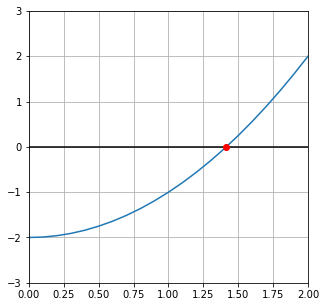

In [20]:
from scipy import optimize

# let's first define the function
def my_f(x):
    return x**2-2
# and the x-axis range of values of interest
x = np.linspace(0,100,1000)
# and plot it
fig, ax = plt.subplots(figsize=(5,5))
ax.axhline(0,color="k")
ax.plot(x,my_f(x))
# focussing on the area of the root
ax.set_xlim(0,2)
ax.set_ylim(0-3,3)
ax.grid()

# let's try to find it with the bisection method
pos_root = optimize.bisect(my_f, 0, 100)
print("bisect roots:", pos_root)
# then plot it
ax.plot(pos_root,my_f(pos_root),'ro')
# and compare it to:
# - the Brent method with hyperbolic extrapolation
pos_root = optimize.brenth(my_f, 0, 100)
print("brenth roots:", pos_root)
# - the Newton-Raphson method
pos_root = optimize.newton(my_f, +0.1, fprime=(lambda x: 2*x))
print("newton roots:", pos_root)
# the methods are pretty equivalent, up until the 10th
# decimal point

## Exercise 3

Given the following set of data:

`x = np.array([0, 1, 3, 4, 6, 8, 9])`

`y = np.array([0, 0.15, 0.8, 0.9, 1.3, 2, 1.3])`

a. Interpolate the function linearly and find its values in `[2, 5, 7]`
Plot both the dataset and the interpolated values with points.

b. Create a new array of values between [0, 10] with at least 100 points and find the cubic interpolation of the above dataset.
Plot the result. Be careful with the values above (or below) the range of y datapoints. You can choose either to extrapolate the interpolated value at x=10 or to force the interpolation so that the extremes take the value of the last defined points in the sample. Try both options.


Interpolated function in [2,5,7]: [0.475 1.1   1.65 ]


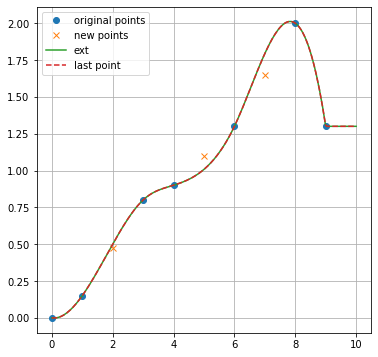

In [24]:
import scipy.interpolate
# first, let's initialize the arrays
x = np.array([0,1,3,4,6,8,9])
y = np.array([0,0.15,0.8,0.9, 1.3,2,1.3])

# a
# let's interpolate (x,y) linearly 
int_func_lin = scipy.interpolate.interp1d(x, y, kind='linear')
# and evaluate the interpolation just found in the 
# requested points
print("Interpolated function in [2,5,7]:", int_func_lin([2,5,7]))
# graphically, the result of the linear
# interpolation is:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y,"o",label='original points')
ax.plot([2,5,7] ,int_func_lin([2, 5, 7]), "x",label='new points')

# b
# let's find the cubic interpolation
# - first with extrapolation of the interpolated value at x=10
int_func_cub=scipy.interpolate.interp1d(x,y,kind='cubic',
                                        bounds_error=False,
                                        fill_value="extrapolate")
# - alternatively, by forcing the interpolation so that
#   the extremes take the value of the last defined points
#   in the sample
int_func_cub=scipy.interpolate.interp1d(x,y,kind='cubic',
                                        bounds_error=False,
                                        fill_value=(y[0], y[-1]))

# I then plot the result of the cubic interpolation
# (of both methods) in the requested manner
x_s = np.linspace(0,10,200)
ax.plot(x_s, int_func_cub(x_s),label='ext')
ax.plot(x_s, int_func_cub(x_s), "--",label='last point')
ax.grid()

ax.legend()

## Exercise 4

Consider the following dataset:

`xdata = np.array([ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])`

`ydata = np.array([1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1])`

a. Fit the data with a Gaussian function (you can use the one you defined in exercise 1, adding an amplitude). Print the mean and standard deviation. Plot the datapoints and the Fitted function.

b. Do the same with a cosine function (you should give a few parameters to your cosine, like an amplitude, frequency). If the output is not satisfying, try to add an initial guess for your parameters!


mean = 0.050181529491075974
sigma = 5.635918940551412
ampl = 239.24434408926797
[[1.98293834e-02 9.47580777e-05 2.63133353e-03]
 [9.47580777e-05 2.51503888e-02 5.68640461e-01]
 [2.63133353e-03 5.68640461e-01 2.95568745e+01]]


omega = 0.14649402256348684
A = 16.314732632854003
[[8.14037804e-07 4.53865430e-05]
 [4.53865430e-05 1.23014870e-02]]


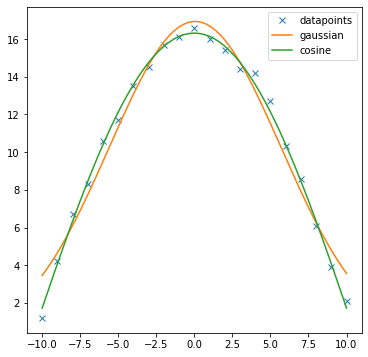

In [26]:
from scipy.optimize import curve_fit
# let's initialize the vectors
xdata = np.array([ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
ydata = np.array([1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1])

# and define the gaussian function
def my_gaussian(x,mean,sigma,ampl):
    return ampl*np.exp(-0.5*(x-mean)**2/sigma**2)/np.sqrt(2*np.pi)/sigma
# that is going to serve as the model for our
# curve-fitting
parameters, covariance = curve_fit(my_gaussian, xdata, ydata, p0=(0,3,100))
# I then extract the parameters of the fit
fit_mean, fit_sigma, fit_ampl = parameters[0], parameters[1],  parameters[2]
# and show said parameters of the fit to the user,
# together with the covariance of the fit
print("mean =", fit_mean)
print("sigma =",fit_sigma)
print("ampl =",fit_ampl)
print(covariance)
# let's plot everything
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(xdata, ydata, "x", label = "datapoints")
xs= np.linspace(xdata[0], xdata[-1], 200)
plt.plot(xs, my_gaussian(xs, fit_mean, fit_sigma, fit_ampl),
         label = "gaussian" )


# b
# I then do everything I just did for the same
# data set with a cosine function
# so I define the function
def my_cosine(x,omega, A):
    return A*np.cos(omega*x)
# then fit the data to such model
parameters, covariance = curve_fit(my_cosine, xdata, ydata, p0 = [1./10., 15.])
# get the estimated parameters
fit_omega,fit_A = parameters[0], parameters[1]
# and print them to the user, with the covariance
print("\n\nomega =", fit_omega)
print("A =",fit_A)
print(covariance)
# I quickly define a range for the x-axis
xs= np.linspace(xdata[0], xdata[-1], 200)
# and plot the fit I just found
plt.plot(xs, my_cosine(xs, fit_omega,  fit_A), label = "cosine" )
plt.legend()
plt.show()

### Exercise 7

Consider the image *Christimas.png* with resolution 1240x1600. **Matplotlib.image** can open images in a very straightforward way:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image = mpimg.imread('christmas.png')

print(image.shape)

(1600, 1240, 4)


We get a 3-D array, where the first two dimensions pertain to the pixel size, while the third contains the information about each pixel. In particular we have four values for RGBA image, where the first three are the R G B contribution, while the fourth A denotes the transparency. Since the image is in black and white you can see that the R G B number are all equal, and A is 0 or 1. 

Open the image with an visual editor, as you can see the image is formed by two nearly identical sub-images. Spot the differences between the two sub-images. Proceed as follows:

- plot the image with matplotlib.imshow
- crop the borders (hint: you can easily use numpy slicing. Also remind that the first two indices define the width and height of the image!) and remove the A parameter, i.e. you have to create a new image where the shape is (x,y,3).
- divide the two sub-images into two different objects, beware that these have the same dimension!
- plot the difference and check if the differences are highlighted.

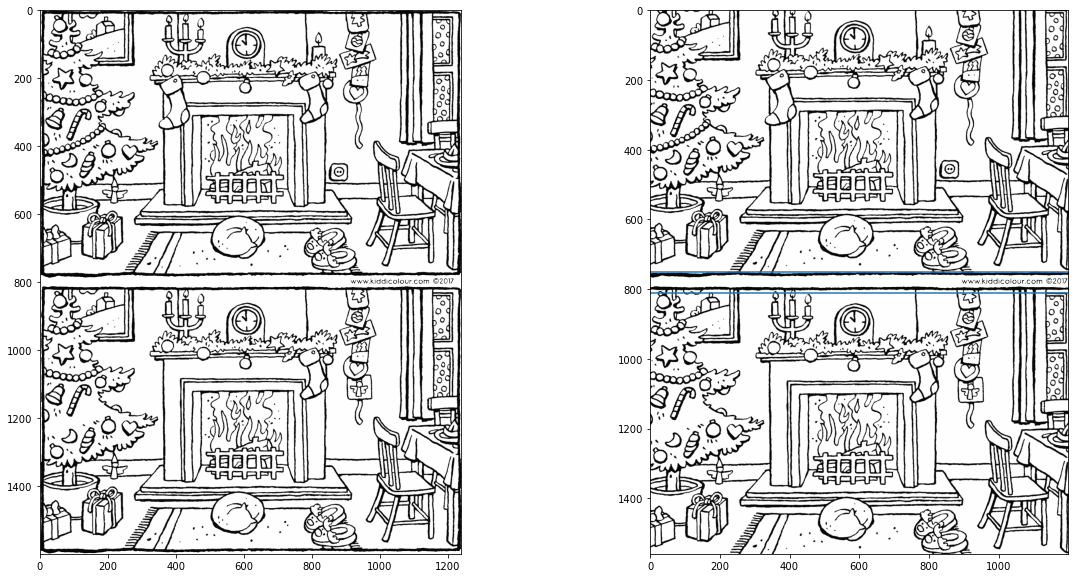

In [2]:
# first we plot the image and try to see how we can crop it
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(image)
ax[1].imshow(image[ 20:-20, 20:-20, :]) # cropped
ax[1].axhline(y=750,xmin=0,xmax=1)
ax[1].axhline(y=1560-750,xmin=0,xmax=1)

cropped shape: (1560, 1200, 3)
image 1 shape: (750, 1200, 3)
image 2 shape: (750, 1200, 3)


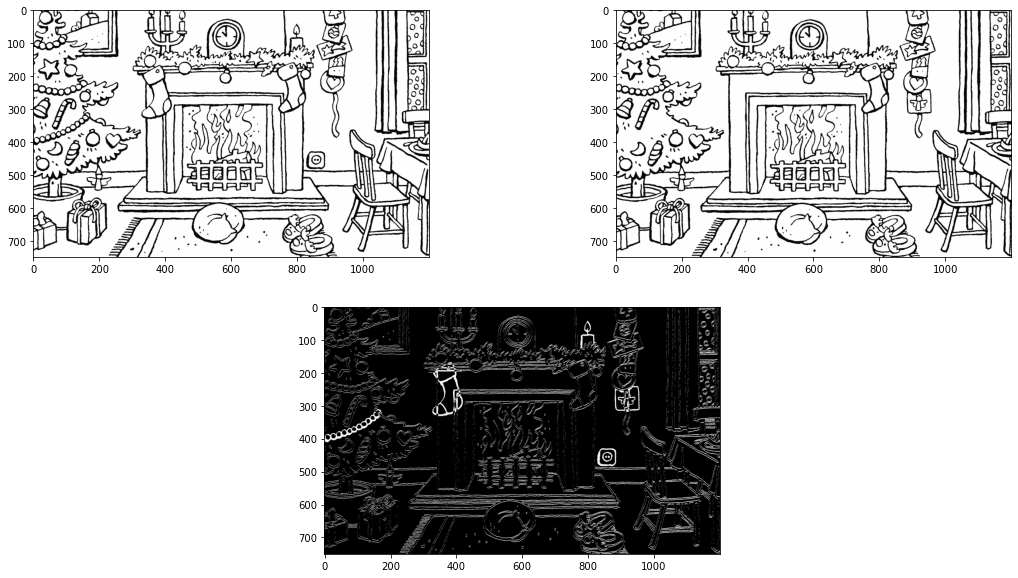

In [3]:
# we crop the borders and remove the fourth element in the third dimension
cropped = np.delete(image[ 20:-20, 20:-20, :],[3],axis=2)
print("cropped shape:",cropped.shape)

# find a pixel size that divide the image into two equal parts
crop1 = cropped[0:750, :, :]
crop2 = cropped[-crop1.shape[0]:, :, :] # <-- same size of crop1!

print("image 1 shape:",crop1.shape)
print("image 2 shape:",crop2.shape)

# plot the two images and the difference
figg  = plt.figure(figsize=(20,10))
grid = figg.add_gridspec(2,4)
ax1  = figg.add_subplot(grid[0, :2])
ax2  = figg.add_subplot(grid[0, 2:])
ax3  = figg.add_subplot(grid[1, 1:3])
ax1.imshow(crop1)
ax2.imshow(crop2)
ax3.imshow(np.abs(crop1-crop2))
plt.show()